In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df = pd.read_csv('medal.csv')
df.head()

,Rank,Country Code,Gold Medal,Silver Medal,Bronze Medal,Total,Country
0,1,USA,39,41,33,113,United States of America
1,2,CHN,38,32,18,88,People's Republic of China
2,3,JPN,27,14,17,58,Japan
3,4,GBR,22,21,22,65,Great Britain
4,5,ROC,20,28,23,71,ROC


In [4]:
pd.isnull('df') # there is no any null values

False

<code>Central Limit Theorem</code>

In [5]:
population = df['Total']

<AxesSubplot: >

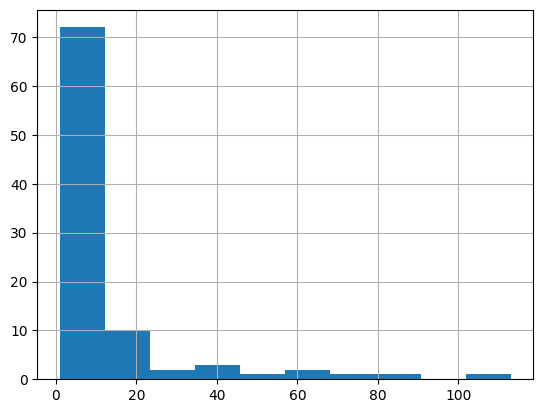

In [6]:
population.hist(bins=10)
# plt.xlabel('Gold Medal')
# plt.ylabel('Total')
# plt.show()

The distribution of <code>Total</code> is <code>Right Skewed</code>

In [7]:
population.mean()

11.612903225806452

The <code>mean value</code> of Total feature is around <code>12</code>

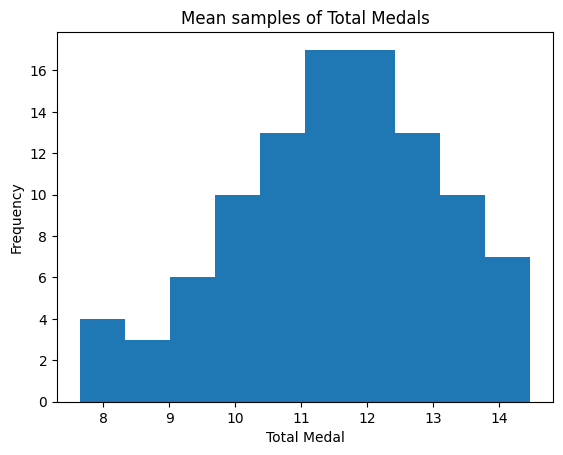

In [8]:
# grab some samples from our population

# create an empty list
sampled_means = []

# for 100 times
for row in range(100):
    # taking random sample of 50 rows from population and take the mean of these rows 
    # and append to sampled_means list
    sampled_means.append(population.sample(50).mean()) 

# plotting histogram
plt.figure(dpi = 100) #resolution of the figure
plt.hist(sampled_means)

plt.xlabel('Total Medal')
plt.ylabel('Frequency')
plt.title("Mean samples of Total Medals")
plt.show()

<code>Standard Error</code>

In [9]:
population

0     113
1      88
2      58
3      65
4      71
     ... 
88      1
89      1
90      1
91      1
92      1
Name: Total, Length: 93, dtype: int64

In [10]:
df['Gold Medal'].sem()

0.7281963320443087

<code>Bootstrapping</code>

In [27]:
from sklearn.utils import resample

results = []

for row in range(100):
    sample = resample(df['Gold Medal'])
    results.append(sample.mean())
    
results = pd.Series(results)
print('Bootstrap Statistics:')
print(f'original: {df["Gold Medal"].mean()}')
print(f'bias: {results.mean() - df["Gold Medal"].mean()}')
print(f'std. error: {results.std()}')

Bootstrap Statistics:
original: 3.6559139784946235
bias: -0.052688172043010795
std. error: 0.6643511151855523


In [23]:
resample(df['Gold Medal']).mean()

3.6451612903225805

<code>Confidence Intervals</code>

In [32]:
import numpy as np
import scipy.stats as stat

#define a sample data
data = df['Gold Medal'][:20]

#create 95% confidence interval for gold medal mean weight
stat.t.interval(alpha=0.95, df=len(data)-1, loc=np.mean(data), scale=stat.sem(data))

C:\Users\rmans\AppData\Local\Temp\ipykernel_2804\1398032327.py:8: DeprecationWarning: Use of keyword argument 'alpha' for method 'interval' is deprecated and wil be removed in SciPy 1.11.0. Use first positional argument or keyword argument 'confidence' instead.
  stat.t.interval(alpha=0.95, df=len(data)-1, loc=np.mean(data), scale=stat.sem(data))


(7.862718639949687, 18.03728136005031)

<code>Normal Distribution</code>

((array([-1.8241636 , -1.38768012, -1.11829229, -0.91222575, -0.73908135,
         -0.5857176 , -0.44506467, -0.31273668, -0.18568928, -0.06158146,
          0.06158146,  0.18568928,  0.31273668,  0.44506467,  0.5857176 ,
          0.73908135,  0.91222575,  1.11829229,  1.38768012,  1.8241636 ]),
  array([0, 0, 0, 0, 0, 1, 1, 1, 1, 2, 2, 2, 2, 3, 3, 3, 3, 4, 4, 4],
        dtype=int64)),
 (1.4507076172782642, 1.7999999999999998, 0.9586812571322109))

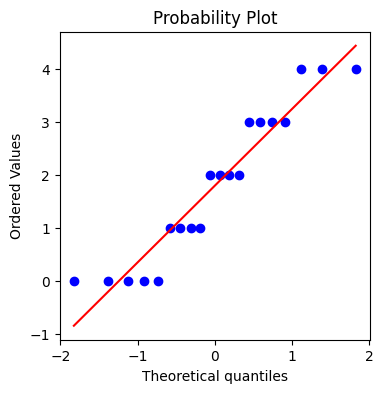

In [40]:

from scipy import stats

fig, ax = plt.subplots(figsize=(4, 4))
norm_sample = df['Gold Medal'].sample(20)
stats.probplot(norm_sample, plot=ax)
